In [1]:
from matplotlib import pyplot as plt
import math
import numpy as np

In [2]:
def sigmoid(z):
    return 1 / (1 + math.e ** -z)

def predict(features, weights):
    z = features[:,0] * weights[0] + features[:,1] * weights[1] + weights[2]
    return sigmoid(z)

def updateWeights(features, labels, thetas, alpha):
    predictions = predict(features, thetas)
    thetas[0] += alpha * np.sum(np.dot((labels - predictions), features[:,0]))
    thetas[1] += alpha * np.sum(np.dot((labels - predictions), features[:,1]))
    thetas[2] += alpha * np.sum(labels - predictions)
    return thetas

def train(features, labels, thetas, alpha, iters):
    for i in range(iters):
        thetas = updateWeights(features, labels, thetas, alpha)

    return thetas

def getClassifierLine(features, thetas):
    return (thetas[2] + thetas[0] * features[:, 0]) * (-1 / thetas[1])

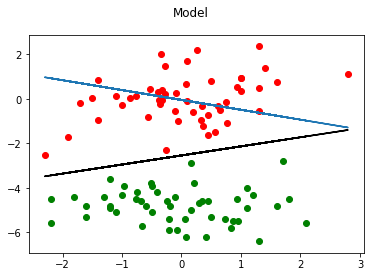

In [3]:
# load data
data = np.loadtxt(fname = 'data.txt')
# split features and labels
features = data[:, :2]
labels = data[:, 2]

# init weights randomly
thetas = np.random.normal(0, 0.01, 3)
# copy baseline for plotting
old_thethas = np.copy(thetas)

# train model
thetas = train(features, labels, thetas, 0.25, 100)

# plot data and classifier lines
fig = plt.figure()
plt.scatter(features[:50, 0], features[:50, 1], color='red')
plt.scatter(features[50:, 0], features[50:, 1], color='green')
plt.plot(features[:, 0], getClassifierLine(features, thetas), 'k')
plt.plot(features[:, 0], getClassifierLine(features, old_thethas))
fig.suptitle('Model')
plt.show()